In [1]:
import pandas as pd
from hazm import *
import time
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_csv("vehicles.csv")

In [3]:
len(dataFrame)

130443

In [4]:
dataFrame = dataFrame[dataFrame["price"] != -1]
dataFrame = dataFrame.dropna() # Drop dataframe for now. NOT THE PERFECT WAY BUT JUST FOR NOW!
# dataFrame = dataFrame[dataFrame["year"] != "<1366"]
dataFrame["year"] = dataFrame["year"].replace(["<1366"] , 1365)
dataFrame

# Category and brand are categorical
# created_at and image_count are useless info

,brand,category,created_at,description,image_count,mileage,price,title,year
2,پژو ۴۰۵::Peugeot 405,light,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,0,290000.0,8500000,پژو مدل 81 مشکی,1381
3,نیسان::Nissan,light,Wednesday 01PM,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,3,175000.0,19500000,پاترول 2در,1372
4,سمند::Samand,light,Thursday 07AM,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,4,80000.0,23900000,سمند دوگانه کارخانه,1391
5,پژو ۴۰۵::Peugeot 405,light,Thursday 08AM,بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم,3,125000.0,8500000,پژو405 مدل84,1384
6,ام‌وی‌ام::MVM,light,Thursday 08AM,ام وی ام چهار سیلندر مدل 93 فنی سالم بدون رنگ ...,2,11000.0,18500000,ام وی ام 110 چهار سیلندر,1393
7,پراید صندوق‌دار::Pride,light,Thursday 09AM,یک پراید مدل 87خونگی بدون رنگ سفید هفت سال تخف...,1,200000.0,11000000,پرایدصبامدل87خونگی فابریک,1387
8,پراید هاچ‌بک::Pride,light,Friday 04AM,مدل 80 رنگ سفید بیمه تا برج ۱۱ فنی سالم رینگ ...,3,1.0,7800000,پراید هاچ بک مدل 80,1380
9,سایر,light,Friday 12PM,در حد_ بسیار تمیز_ سرویس گارانتی انجام شده_ ما...,1,17000.0,45000000,جک جی ۵ دنده ای,1393
12,پراید صندوق‌دار::Pride,light,Saturday 12PM,پرایددوگانه فابریک سفیدفنی درجه یک تازه تعمیرب...,3,250000.0,11000000,پراید دوگانه فابربک,1388
13,پژو ۲۰۶‍::Peugeot 206,light,Saturday 01PM,سقف و دوتا در فابریک ،شاسی راننده کمی خوردگی ،...,4,120000.0,14800000,206تیپ دو,1386


In [5]:
print("Number of columns: " + str(len(dataFrame.columns)))
print("Number of rows: " + str(len(dataFrame)))
print(dataFrame["brand"].describe())
print(dataFrame["category"].describe())
print(len(dataFrame))

Number of columns: 9
Number of rows: 103799
count                     103799
unique                        26
top       پراید صندوق‌دار::Pride
freq                       25236
Name: brand, dtype: object
count     103799
unique         1
top        light
freq      103799
Name: category, dtype: object
103799


In [6]:
# One Hot Encoding
brandOneHot = pd.get_dummies(dataFrame["brand"])
categoryOneHot = pd.get_dummies(dataFrame["category"])

informationGainFeatures calculated!
oneHotCategoryInfoGain calculated!
oneHotBrandInfoGain calculated!


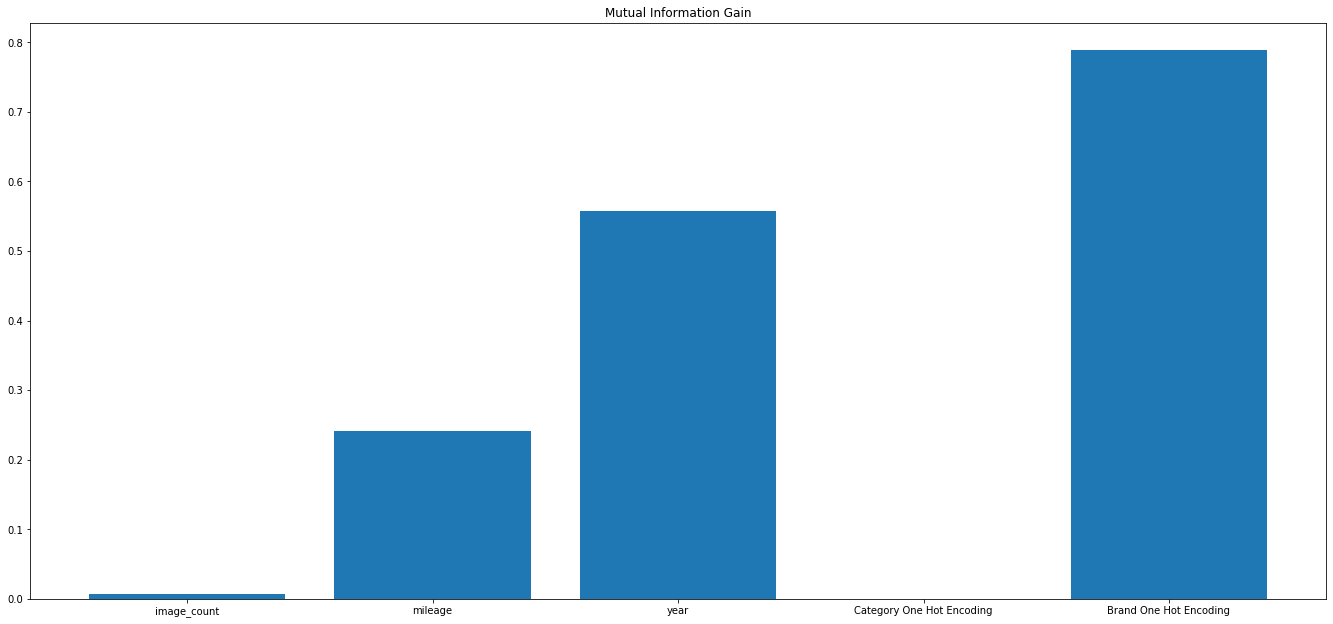

In [7]:
features = ["image_count" , "mileage" , "year"]
X = dataFrame[features]
Y = dataFrame["price"]
informationGainFeatures = mutual_info_regression(X , Y , random_state = 42)
print("informationGainFeatures calculated!")
oneHotCategoryInfoGain = mutual_info_regression(categoryOneHot , Y , random_state = 42)
print("oneHotCategoryInfoGain calculated!")
oneHotBrandInfoGain = mutual_info_regression(brandOneHot , Y , random_state = 42)
print("oneHotBrandInfoGain calculated!")

fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.bar(np.concatenate((features, ["Category One Hot Encoding" , "Brand One Hot Encoding"])),
       np.concatenate((informationGainFeatures, [sum(oneHotCategoryInfoGain) , sum(oneHotBrandInfoGain)])))
plt.title("Mutual Information Gain")
plt.show()

In [7]:
dataFrame = dataFrame.drop(columns = ['brand', 'category' , "image_count" , "created_at"])

# scaler = StandardScaler()
# dataFrame["year"] = scaler.fit_transform(dataFrame["year"].values.reshape(-1,1))
# dataFrame["mileage"] = scaler.fit_transform(dataFrame["mileage"].values.reshape(-1,1))

In [8]:
punctuation = set('''?\#$%@&^.؟؛][=*×،!-+ـ)(٪:«»<>…/_.,{};~'"|٬٫''')
whitespace = {"\t" , "\n" , "\r"}
stopWords = set(stopwords_list())

dataFrame["combinedTexts"] = dataFrame["description"] + " " + dataFrame["title"]
dataFrame = dataFrame.drop(columns = ["title", "description"])

numWords = {}
numWordsEachRow = []

def removePunctuationWhitespaceAndGetWords(text):
    i = 0
    while(i < len(text)):
        if(text[i] in whitespace or text[i] in punctuation):
            text = text[:i] + "" + text[i+1:]
            continue
        i += 1
    return word_tokenize(text)

def removeStopWordsAndLemmatizeWords(words):
    finalWords = set()
    rowNums = {}
    for word in words:
        if(word not in stopWords):
            lemmatizedWord = lemmatizer.lemmatize(word)
            finalWords.add(lemmatizedWord)

            if(lemmatizedWord not in numWords):
                numWords[lemmatizedWord] = 1
            else:
                numWords[lemmatizedWord] += 1            
            
            if(lemmatizedWord not in rowNums):
                rowNums[lemmatizedWord] = 1
            else:
                rowNums[lemmatizedWord] += 1
    
    numWordsEachRow.append(rowNums)
    
    return finalWords

lemmatizer = Lemmatizer()
normalizer = Normalizer()
dataFrame["combinedTexts"] = dataFrame["combinedTexts"].apply(normalizer.normalize)
dataFrame["combinedTexts"] = dataFrame["combinedTexts"].apply(removePunctuationWhitespaceAndGetWords)
dataFrame["combinedTexts"] = dataFrame["combinedTexts"].apply(removeStopWordsAndLemmatizeWords)

numWordsEachRow = numWordsEachRow[::-1]

In [9]:
totalNumWordsEachRow = []
totalNumOfOccuranceInDF = {}

def fillNumWords(numWords , words):          
    for word in words:
        if(word not in totalNumOfOccuranceInDF):
            totalNumOfOccuranceInDF[word] = 1
        else:
            totalNumOfOccuranceInDF[word] += 1
            
    totalNumWordsEachRow.append(len(words))
       

dataFrame.apply(lambda row : fillNumWords(numWords , row["combinedTexts"]), axis = 1);
newFeaturesList = sorted(numWords.items(), key = lambda item: item[1], reverse=True)[:250]

totalNumWordsEachRow = totalNumWordsEachRow[::-1]
indices = list(dataFrame.index)[::-1]

In [10]:
def addFeaturesToDF(row , newFeaturesList , numWordsEachRow , totalNumWordsEachRow , totalNumOfOccuranceInDF , indices):
    for word , _ in newFeaturesList:
        if(word in numWordsEachRow[-1]):
            dataFrame.loc[indices[-1] , word] = (numWordsEachRow[-1][word] / totalNumWordsEachRow[-1]) * \
                                                (np.log10(len(dataFrame) / totalNumOfOccuranceInDF[word]) )
    numWordsEachRow.pop()
    totalNumWordsEachRow.pop()
#     print(indices[-1])
    indices.pop()

dataFrame = pd.concat([dataFrame , brandOneHot] , axis = 1)
for word , _ in newFeaturesList:
    dataFrame[word] = 0

tic = time.time()
dataFrame.apply(lambda row : addFeaturesToDF(row , newFeaturesList , numWordsEachRow , totalNumWordsEachRow ,
                                             totalNumOfOccuranceInDF , indices), axis = 1);
dataFrame = dataFrame.drop(columns = ['combinedTexts'])
toc = time.time()

print("Time: " + str(toc - tic))
# dataFrame

KeyboardInterrupt: 

In [92]:
from IPython.core.display import HTML
df = dataFrame.head()
display(HTML(df.to_html()))

,mileage,price,year,ام‌وی‌ام::MVM,بنز::Mercedes-Benz,بی‌ام‌و::BMW,تندر ۹۰::Tondar 90,تویوتا::Toyota,تیبا::Tiba,دوو::Daewoo,رانا::Runna,رنو::Renault,زانتیا::Citroen Xantia,سایر,سمند::Samand,لیفان::Lifan,نیسان::Nissan,هیوندای (غیره)::Hyundai,هیوندای سوناتا::Hyundai Sonata,وانت,پراید صندوق‌دار::Pride,پراید هاچ‌بک::Pride,پژو روآ / آر‌دی::RD/ROA,پژو پارس::Peugeot Pars,پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,پژو ۲۰۶‍::Peugeot 206,پژو ۴۰۵::Peugeot 405,پیکان::Peykan,کیا::Kia,رنگ,بیمه,مدل,سالم,تخفیف,پراید,سال,فن,لاستیک,نو,پژو,دوگانه,ماشین,سفید,برج,تمیز,عقب,جلو,موتور,خودرو,۲۰۶,روکش,خط,گلگیر,۹۰,تماس,شرط,مصرف,۴۰۵,فابریک,پارس,تازه,تعویض,داره,سمند,پیکان,دزدگیر,خش,فول,درصد,ضبط,۹۳,واقعی,سوز,کارکرد,فروش,العاده,سلام,کارخانه,بدنه,صندلی,دست,مشک,کف,۱۰,معاوضه,تصادف,دیوار,لکه,ام,سند,۹۶,باند,رینگ,ال,قیمت,میباشد,۸۰,کاپوت,۸۳,تک,۸۹,یه,۹۴,آخر,تیپ,۱۱,انجام,۱۲,بیرنگ,۸۸,کار,نوک,۸۵,تعمیر,یکسال,پای,فوری,اخر,گرفت#گیر,۸۴,معامله,مدادی,خریدار,اس,۸۶,۹۱,۱۳۱,خرج
2,290000.0,8500000,1381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0.000000,0.027512,0.021664,0.000000,0.000000,0.0,0.032839,0.030792,0.033771,0.000000,0.080662,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.060453,0.0,0.000000,0.000000,0.0,0.0,0.061542,0.0,0.06418,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.067747,0.0,0.0,0.071105,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074189,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.075836,0.075290,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,175000.0,19500000,1372,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.023645,0.000000,0.0,0.000000,0.000000,0.000000,0.041636,0.000000,0.042867,0.042324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.060114,0.0,0.000000,0.0,0.064256,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.067012,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80000.0,23900000,1391,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.019457,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.049357,0.000000,0.000000,0.062651,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086697,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.190212,0.0,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.103735,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.101986,0.0,0.000000,0.0,0.0,0.0,0.0,0.108947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.108233,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,125000.0,8500000,1384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0.019457,0.020105,0.031663,0.034558,0.038661,0.0,0.047995,0.000000,0.000000,0.000000,0.058945,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.088165,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.110039,0.0,0.0,0.0,0.0,0.116067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,11000.0,18500000,1393,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.025294,0.026136,0.041162,0.044925,0.050259,0.0,0.000000,0.058505,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.13043,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.626131,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [93]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

In [140]:
X = dataFrame.drop(columns = ["price"])
Y = dataFrame["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.34 , random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
def evaluateModel(test_actual , test_predict , train_actual , train_predict):
    
    evaluationDF = pd.DataFrame([], index=["MSE", "RMSE"], columns=["Test" , "Train"])
    
    evaluationDF.loc["MSE"]["Test"] = metrics.mean_squared_error(test_actual , test_predict)
    evaluationDF.loc["MSE"]["Train"] = metrics.mean_squared_error(train_actual , train_predict) 
    
    evaluationDF.loc["RMSE"]["Test"] = np.sqrt(metrics.mean_squared_error(test_actual , test_predict))
    evaluationDF.loc["RMSE"]["Train"] = np.sqrt(metrics.mean_squared_error(train_actual , train_predict))
    
    return evaluationDF

In [142]:
def LinearRegressionMethod(X_train , Y_train , X_test , Y_test):
    linear_regression = LinearRegression()
    linear_regression = linear_regression.fit(X_train, Y_train)
    test_predict = linear_regression.predict(X_test)
    train_predict = linear_regression.predict(X_train)
   
    return test_predict , train_predict
    
test_predict , train_predict = LinearRegressionMethod(X_train , Y_train , X_test , Y_test)
result = evaluateModel(Y_test , test_predict , Y_train , train_predict)
result

,Test,Train
MSE,2.24828e+14,2.26752e+14
RMSE,1.49943e+07,1.50583e+07


In [16]:
result.loc["RMSE"]["Test"]

14833743.851143777

In [147]:
def DecisionTreeRegressionMethod(best_depth , minSplit , X_train , Y_train , X_test , Y_test):
    reg = tree.DecisionTreeRegressor(max_depth = best_depth , min_samples_split = minSplit)
    reg = reg.fit(X_train, Y_train)
    test_predict = reg.predict(X_test)
    train_predict = reg.predict(X_train)
    
    return test_predict, train_predict

best_depth = 20
minSplit = 150
test_predict, train_predict = DecisionTreeRegressionMethod(best_depth , minSplit , X_train , Y_train , X_test , Y_test)
result = evaluateModel(Y_test , test_predict , Y_train , train_predict)
result

,Test,Train
MSE,1.53283e+14,1.21842e+14
RMSE,1.23808e+07,1.10382e+07


In [135]:
result.loc["RMSE"]["Test"]

12378784.446521936

In [ ]:
def KneighborsRegressionMethod(bestNumofNeighbor , X_train , Y_train , X_test , Y_test):
    KNN = KNeighborsRegressor(n_neighbors = bestNumofNeighbor)
    KNN = KNN.fit(X_train, Y_train)
    test_predict = KNN.predict(X_test)
    train_predict = KNN.predict(X_train)
   
    return test_predict, train_predict

bestNumofNeighbor = 10
test_predict, train_predict = KneighborsRegressionMethod(bestNumofNeighbor , X_train , Y_train , X_test , Y_test)
result = evaluateModel(Y_test , test_predict , Y_train , train_predict)
result

In [19]:
result.loc["RMSE"]["Test"]

21097484.284443118

In [392]:
dataFrame

,mileage,price,year,ام‌وی‌ام::MVM,بنز::Mercedes-Benz,بی‌ام‌و::BMW,تندر ۹۰::Tondar 90,تویوتا::Toyota,تیبا::Tiba,دوو::Daewoo,...,باتری,شدگی,کلا,ب,ستون,٢٠٦,۶,نقد,جهت,درحد
2,290000.0,8500000,1381,0,0,0,0,0,0,0,...,0.089603,0.165256,0.070339,0.105643,0.049835,0.251148,0.074965,0.369128,0.090738,0.071136
3,175000.0,19500000,1372,0,0,0,0,0,0,0,...,0.089603,0.165256,0.070339,0.105643,0.049835,0.251148,0.074965,0.369128,0.090738,0.071136
4,80000.0,23900000,1391,0,0,0,0,0,0,0,...,0.089603,0.165256,0.070339,0.105643,0.049835,0.251148,0.074965,0.369128,0.090738,0.071136
5,125000.0,8500000,1384,0,0,0,0,0,0,0,...,0.089603,0.165256,0.070339,0.105643,0.049835,0.251148,0.074965,0.369128,0.090738,0.071136
6,11000.0,18500000,1393,1,0,0,0,0,0,0,...,0.089603,0.165256,0.070339,0.105643,0.049835,0.251148,0.074965,0.369128,0.090738,0.071136
7,200000.0,11000000,1387,0,0,0,0,0,0,0,...,0.089603,0.165256,0.070339,0.105643,0.049835,0.251148,0.074965,0.369128,0.090738,0.071136
8,1.0,7800000,1380,0,0,0,0,0,0,0,...,0.089603,0.165256,0.070339,0.105643,0.049835,0.251148,0.074965,0.369128,0.090738,0.071136
9,17000.0,45000000,1393,0,0,0,0,0,0,0,...,0.089603,0.165256,0.070339,0.105643,0.049835,0.251148,0.074965,0.369128,0.090738,0.071136
12,250000.0,11000000,1388,0,0,0,0,0,0,0,...,0.089603,0.165256,0.070339,0.105643,0.049835,0.251148,0.074965,0.369128,0.090738,0.071136
13,120000.0,14800000,1386,0,0,0,0,0,0,0,...,0.089603,0.165256,0.070339,0.105643,0.049835,0.251148,0.074965,0.369128,0.090738,0.071136


In [399]:
(dataFrame["بیمه"] == 0.007569).count()

103799

In [400]:
len(dataFrame)

103799

In [124]:
dataFrame

,mileage,price,year,combinedTexts,ام‌وی‌ام::MVM,بنز::Mercedes-Benz,بی‌ام‌و::BMW,تندر ۹۰::Tondar 90,تویوتا::Toyota,تیبا::Tiba,...,گرفت#گیر,۸۴,معامله,مدادی,خریدار,اس,۸۶,۹۱,۱۳۱,خرج
2,1.909658,8500000,-1.199293,"{۱۱, تخیف, تعمیر, پژو, مدل, سال, یکسال, بدنه, ...",0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.735591,19500000,-2.821352,"{فابریک, انداخت#انداز, ماشین, ۲در, داره, ژاپن,...",0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
4,-0.234290,23900000,0.602994,"{ایکس, رنگ, ال, دوگانه, سرویس‌ها, دیوار, انجام...",0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
5,0.225128,8500000,-0.658607,"{پژو, رنگ, مدل, یکسال, سال, تخفیف, پلمپ, شاسی,...",0,0,0,0,0,0,...,0.000000,0.116067,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
6,-0.938729,18500000,0.963452,"{رنگ, مدل, تخفیف, سیلندر, ۹۳, فن, ام, ۱۱۰, بیم...",1,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
7,0.990823,11000000,-0.117921,"{هفت, نرفته, فابریک, جی, روموتور, رنگ, مدل, سا...",0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
8,-1.051021,7800000,-1.379522,"{روکش, ۸۰, ۱۱, رینگ, اگزوز, برج, رنگ, مدل, پرا...",0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
9,-0.877474,45000000,0.963452,"{جک, عقب, سرویس, تمیز, گارانتی, ۵, انجام, جی, ...",0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
12,1.501287,11000000,0.062308,"{عقب, فابربک, دیگه, درجه, فابریک, رنگ, ۱۰, دار...",0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
13,0.174081,14800000,-0.298150,"{دوتا, سال, تیپ, ۹سال, تخفیف, شاسی, ۲۰۶, فابری...",0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
